In [94]:
# Data manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

# Dimensionality Reduction
# from openTSNE.sklearn import TSNE
import umap
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE, Isomap
from mpl_toolkits.mplot3d import Axes3D

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_05_visualization/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

# Задание 1

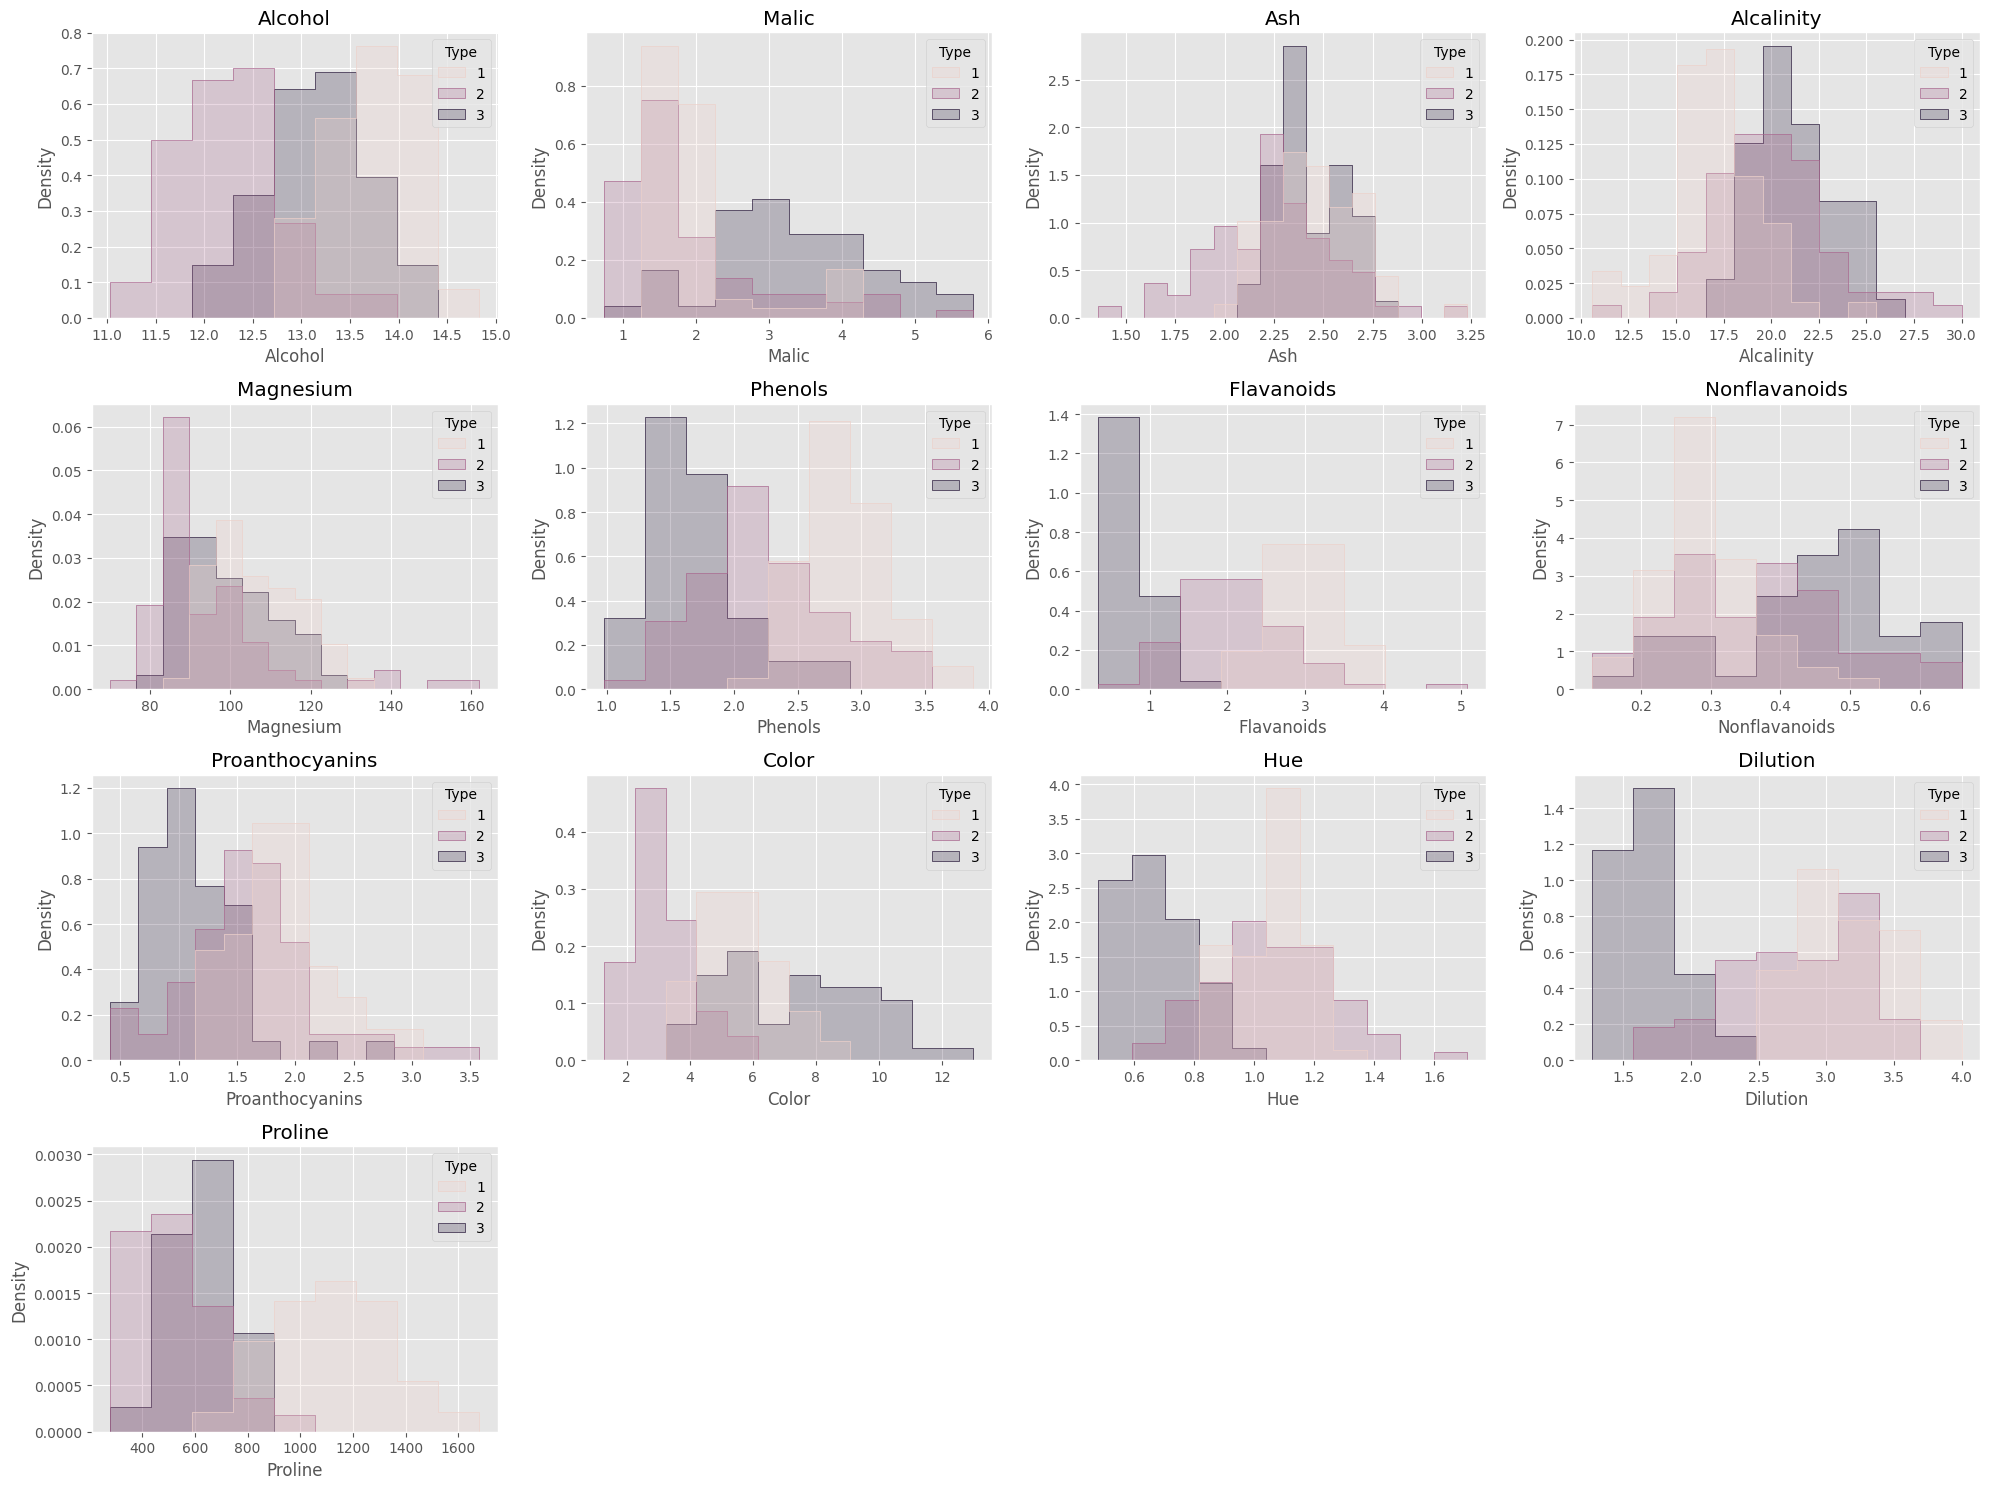

In [4]:
plt.figure(figsize=(20, 15))

# Создание 13 графиков на одном поле с использованием sns.displot для каждой характеристики
for i, column in enumerate(df.columns[1:], start=1):
    plt.subplot(4, 4, i)  # Распределение субплотов на 4 строки и 4 столбца
    sns.histplot(data=df, x=column, hue='Type', element="step", stat="density", common_norm=False)
    plt.title(column)

plt.tight_layout()
plt.show()

## Выводы

- **Alcohol**: Есть небольшое различие в распределении содержания алкоголя в зависимости от типа вина. Видно, что `тип 1` самый крепкий, `тип 2` самый лайтовый.
- **Malic Acid**: `тип 3` имеет более высокое содержание кислоты Malic.
- **Ash**: Во-первых, `тип 2` имеет более широкое распределение состава золы. Во-вторых, для `типа 3`, напротив значения сосредоточились в интервале значений от 2.24 до 2.75.
- **Alcalinity**: Распределение значений щелочности всех трех типов тяготеет к нормальному, однако вино `типа 1` менее щелочное.
- **Magnesium**: видим высокий пик содержания магния для `типа 2` в районе минимальных значений 80-90. Одновременно, только у `типа 2` присутствуют вина с содержанием магния выше 130 и даже с показателем 160.
- **Phenols**: Существенные различия в содержании фенолов, особенно `типом 1`, имеющим значительно более высокие значения.
- **Flavanoids**: Одно из самых заметных различий. Флаваноиды находятся на минимуме у `типа 3`, высокое содержание у `типа 1`
- **Nonflavanoids**: Различия менее выражены, но один `тип 1` имеет меньшее содержание нефлаваноидов.
- **Proanthocyanins**: Наблюдаются различия в содержании проантоцианидинов между типами вин. `тип 3` содержит проантоцианидинов меньше других.
- **Color**: Значительные различия в цвете вин. `типа 3` имеет значение цвета выше, `тип 2` ниже других.
- **Hue**: Есть заметные различия в оттенке вин, у `типа 3` оттенок сосредоточен в интервале 0.2 - 0.8. Для второго типа значение распредлились нормально.
- **Dilution**: Различия в разбавленности вин видны, `тип 1` имеет более высокую степень разбавленности. `тип 3` самый неразбавленный.
- **Proline**: Одно из самых ярких различий, с `типом 1`, имеющим значительно более высокое содержание пролина.

# Задание 2

In [8]:
corr_matrix = df.corr()
top_correlations = corr_matrix['Type'].abs().sort_values(ascending=False)[1:4]

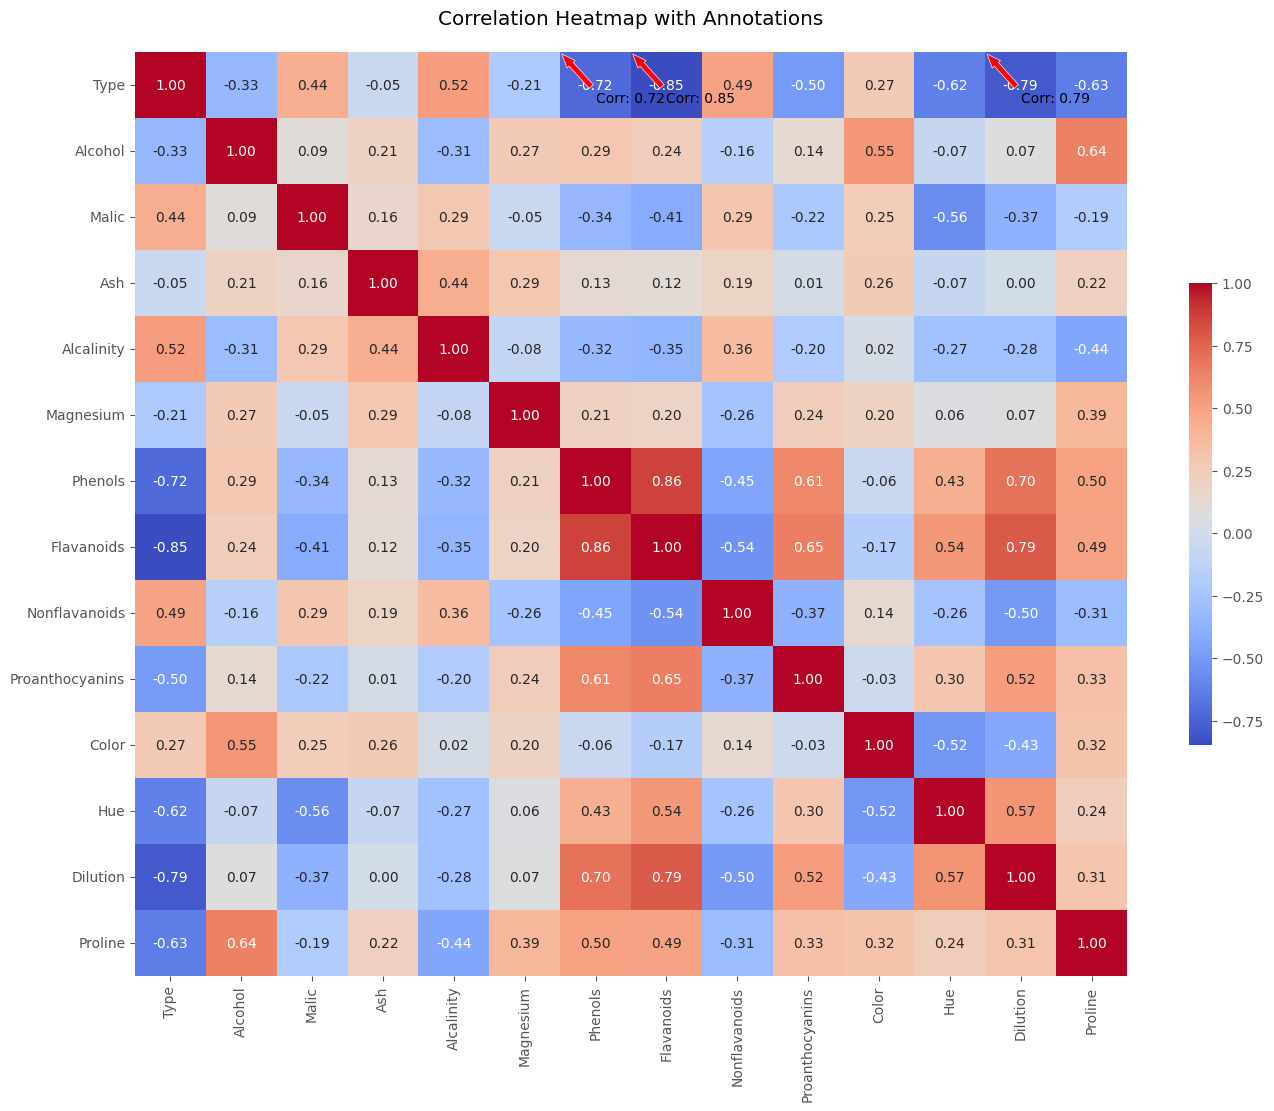

In [10]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
arrowprops = dict(facecolor='red', shrink=0.05, headwidth=8, headlength=10)
plt.title('Correlation Heatmap with Annotations', pad=20)  # отступ

# аннотации
for feature, value in top_correlations.items():
    selected_x = df.columns.get_loc(feature)  # X
    selected_y = 0  # Y 
    text_x = selected_x + 0.5
    text_y = selected_y + 0.7
    
    plt.annotate(f'Corr: {value:.2f}',
                 xy=(selected_x, selected_y), xycoords='data',
                 xytext=(text_x, text_y), textcoords='data',
                 arrowprops=arrowprops, ha='left', va='center')

plt.show()

In [11]:
top_correlations

Flavanoids    0.847498
Dilution      0.788230
Phenols       0.719163
Name: Type, dtype: float64

# Задание 3

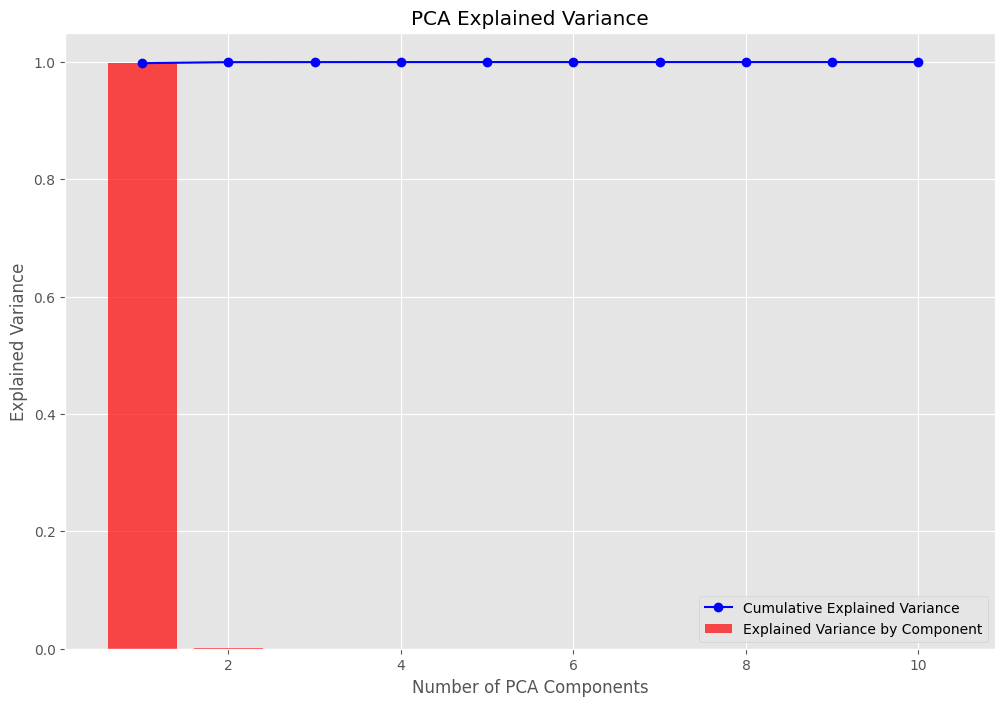

In [12]:
from sklearn.decomposition import PCA
import numpy as np

X = df.drop('Type', axis=1)
y = df['Type']

explained_variances = []
cumulative_variances = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))
    cumulative_variances.append(pca.explained_variance_ratio_)

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), explained_variances, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
plt.bar(range(1, 11), [cumulative_variances[i][-1] for i in range(10)], color='r', alpha=0.7, label='Explained Variance by Component')

plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Где-то ошибка, а где не знаю

# Задание 4

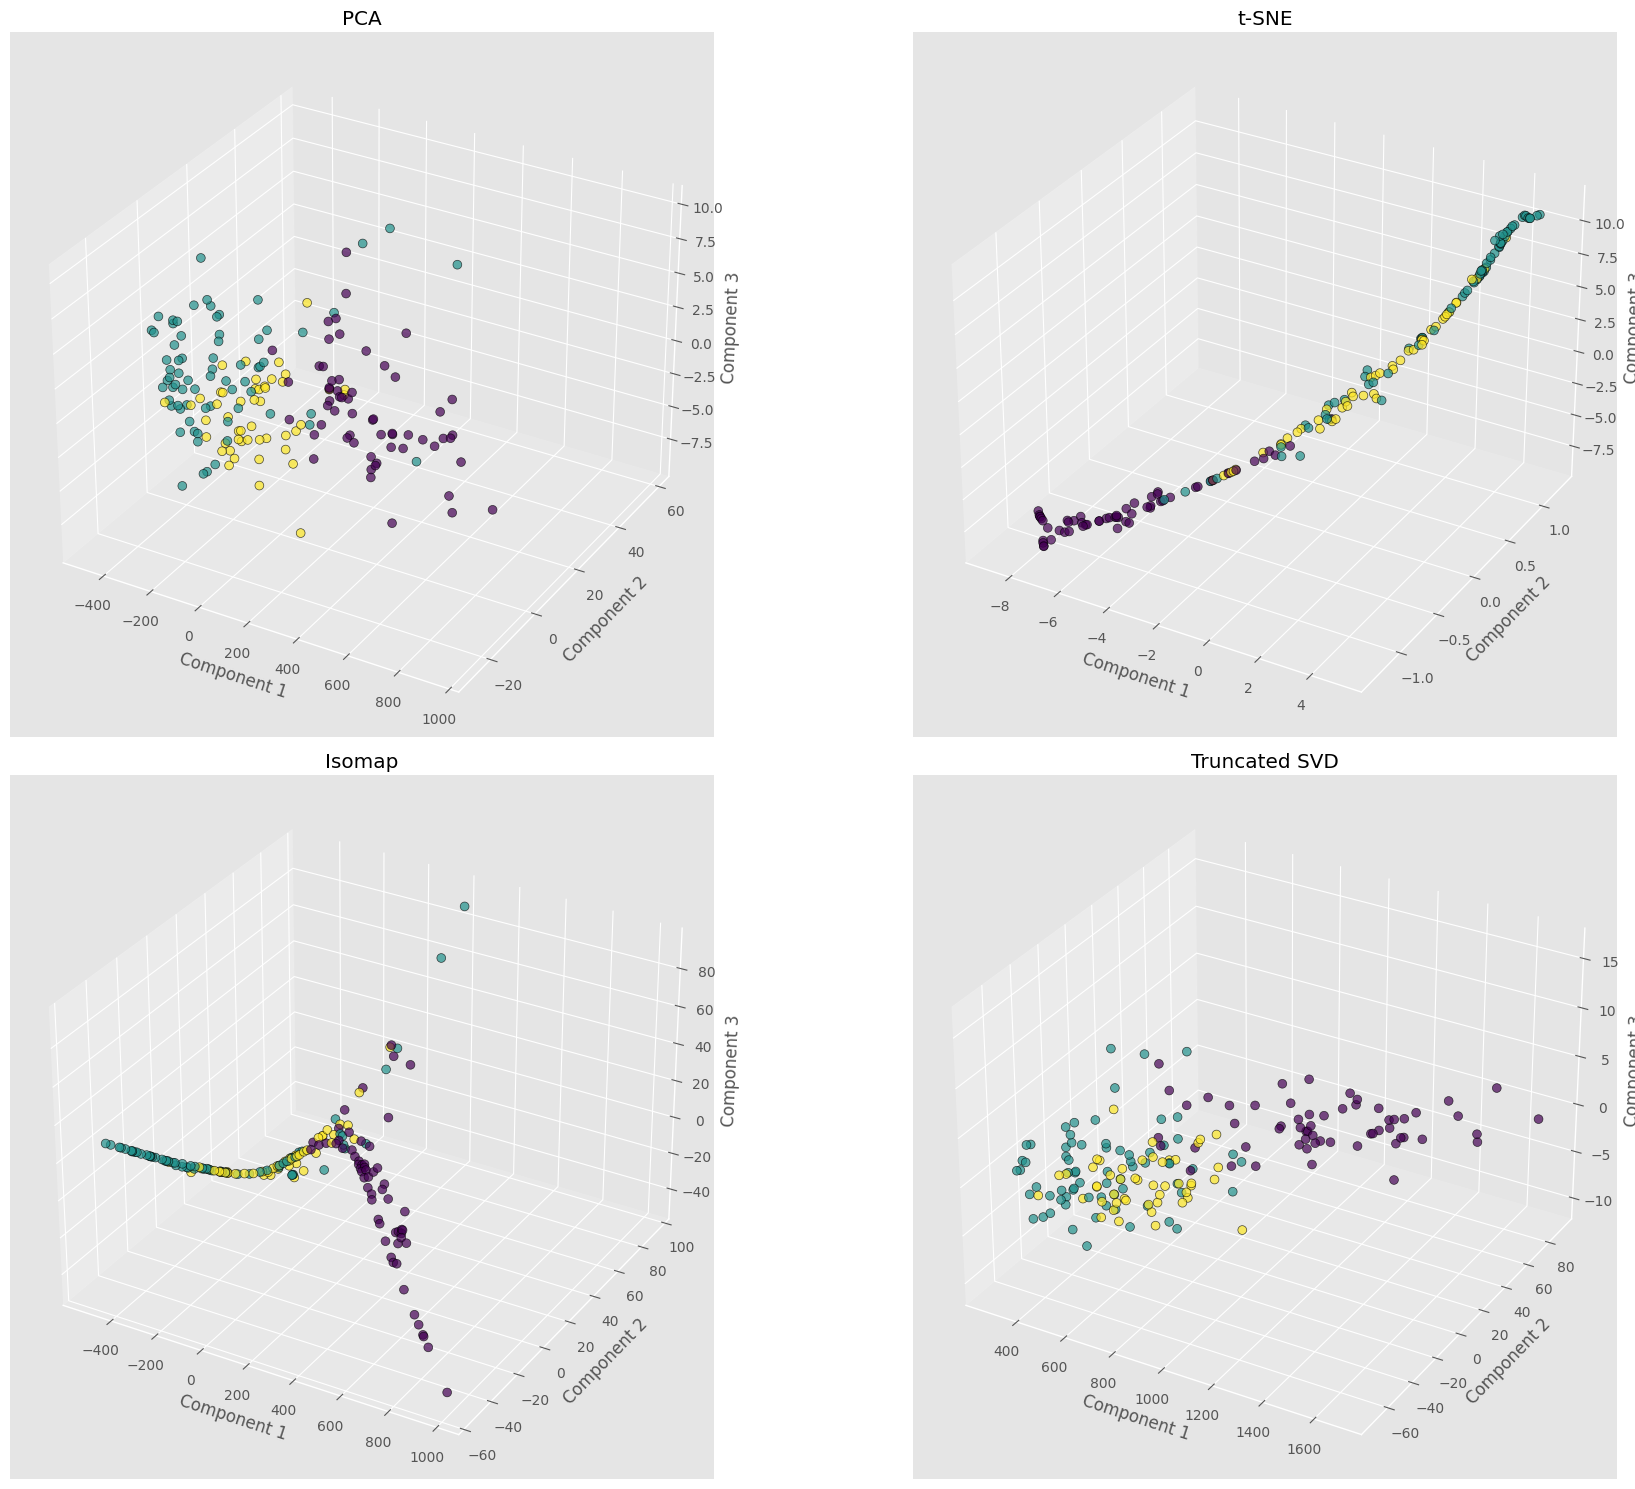

In [13]:
algorithms = {
    'PCA': PCA(n_components=3),
    't-SNE': TSNE(n_components=3, learning_rate='auto', init='random'),
    'Isomap': Isomap(n_components=3),
    'Truncated SVD': TruncatedSVD(n_components=3)
}

fig = plt.figure(figsize=(20, 15))

# Применение каждого алгоритма и отрисовка результатов
for i, (name, algorithm) in enumerate(algorithms.items(), start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    transformed = algorithm.fit_transform(X)
    
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c=y, cmap='viridis', edgecolor='k', s=40, alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")

plt.tight_layout()
plt.show()

## Выводы

**PCA** : Кластеры относительно разделяются, но пересекаются. PCA часто работает хорошо, когда линейные отношения сильны, но он не всегда лучше всего справляется с нелинейными структурами.<br>
**t-SNE**: В этом случае кластеры кажутся хорошо разделенными и даже сгруппированными в виде цепочки, что указывает на то, что t-SNE хорошо работает с нелинейной структурой данных и эффективно отражает локальную структуру данных.<br>
**Isomap** : На графике Isomap видно, что данные представлены в виде кривой в пространстве с меньшим перекрытием между группами, чем PCA, что указывает на наличие нелинейной структуры в данных, с которой Isomap справляется лучше, чем PCA.<br>
**Truncated SVD** : Результаты схожи с PCA, но кажется, что кластеры немного более раздельны. Truncated SVD часто используется с разреженными данными и, похоже, предоставляет аналогичные результаты PCA для этого набора данных.<br>
<br>
Исходя из представленных графиков, моно сделать вывод, что t-SNE имеет наиболее четкое и интерпретируемое разделение. для этой задачи он подходит лучше других, особенно когда важно раскрытие нелинейных структур данных. Альтернативой может быть **Isomap**, поскольку он также показывает хорошее разделение классов, и но менее требователен к ресурсам.

# Задание 5

In [68]:
X = df.drop('Type', axis=1)
y = df['Type']
y = y -1 # для классов с 0

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='rbf') # решил попробовать дополнительно
tsne = TSNE(n_components=2, random_state=42)
isomap = Isomap(n_components=2)

In [72]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_train_isomap = isomap.fit_transform(X_train_scaled)
X_test_isomap = isomap.transform(X_test_scaled)

In [73]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    "CatBoost": CatBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "XGB": XGBClassifier()
}

In [74]:
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_test)
        results[name] = acc_test
    return results

In [ ]:
results_isomap = evaluate_classifiers(X_train_isomap, X_test_isomap, y_train, y_test, classifiers)
results_original = evaluate_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, classifiers)

In [81]:
results_df = pd.DataFrame([results_original, results_isomap], index=['Original', 'Isomap'])

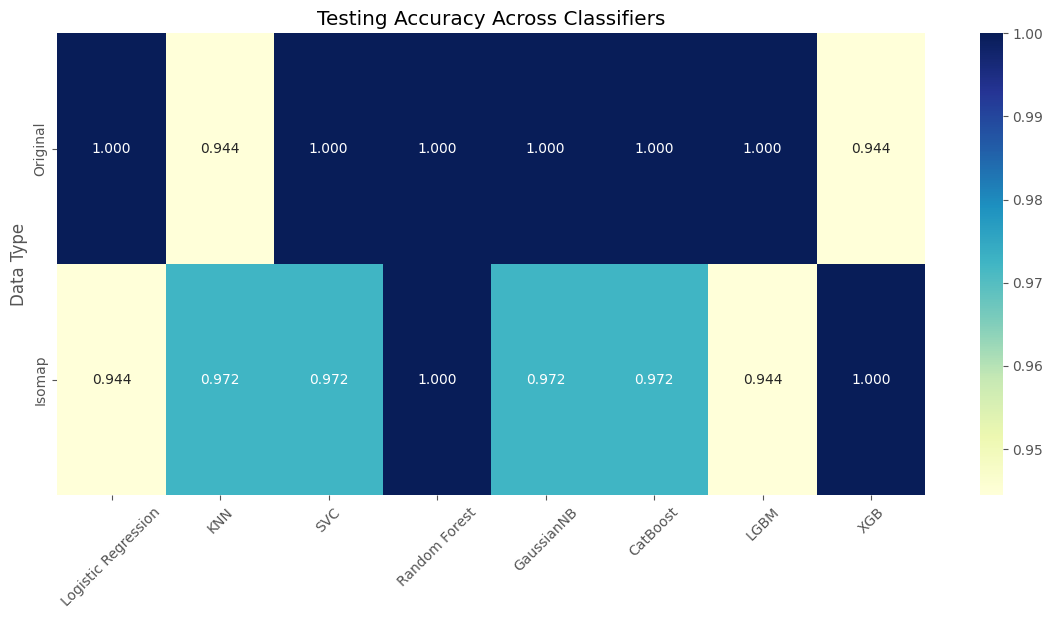

In [82]:
plt.figure(figsize=(14, 6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Testing Accuracy Across Classifiers')
plt.ylabel('Data Type')
plt.xticks(rotation=45)
plt.show()

Тоже где-то ошибка,т.к. результаты получились странные

# Задание 6

In [99]:
best_classifier = CatBoostClassifier()

In [ ]:
best_classifier.fit(X_train_scaled, y_train)

In [101]:
y_pred = best_classifier.predict(X_test_scaled)
y_pred_proba = best_classifier.predict_proba(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



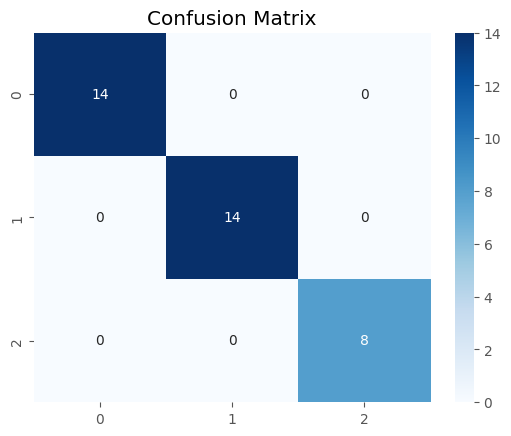

In [102]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [103]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

In [104]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

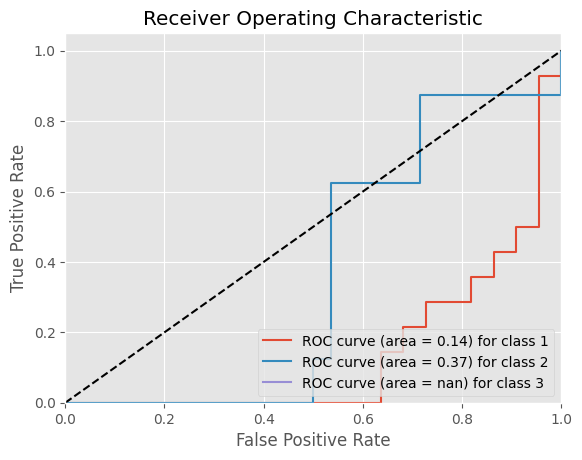

In [105]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i+1}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

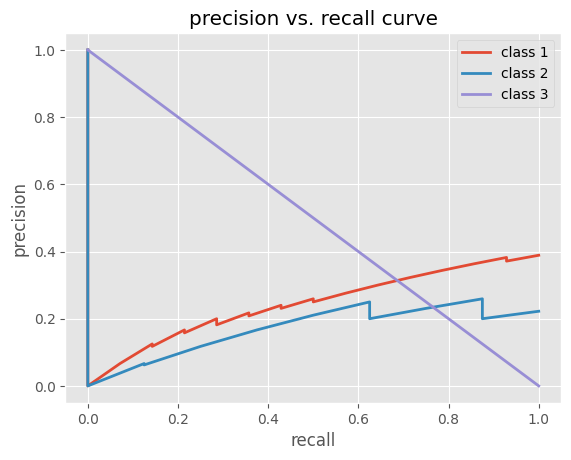

In [106]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i+1}')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# Ну это какой-то бред получился, в этом задании согласен на 0 баллов 🤷‍♂️